# Optimizer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import scipy.stats as stats
import time
import stationarity as st

import sys
sys.path.insert(0, '..')
from multiprocess import mp_pandas_obj

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

<AxesSubplot:xlabel='time'>

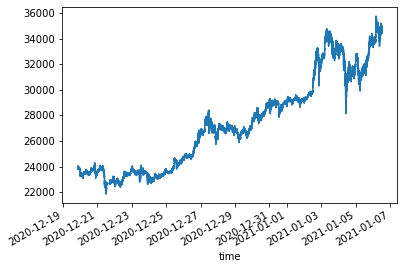

In [3]:
df[8_900_000:9_200_000].close.plot()

In [4]:
# df = df[-1_000_000:-990_000]
df = df[8_900_000:9_200_000]

In [5]:
df

,open,high,low,close,volume
time,,,,,
2020-12-19 20:56:11.621,23901.48,23901.49,23901.48,23901.48,5.049209
2020-12-19 20:56:29.634,23901.48,23909.29,23901.48,23909.29,5.071554
2020-12-19 20:56:34.917,23909.30,23909.35,23903.91,23907.86,5.424907
2020-12-19 20:56:52.206,23907.86,23907.87,23907.86,23907.86,5.264295
2020-12-19 20:57:03.769,23907.87,23907.87,23901.75,23901.75,5.183816
...,...,...,...,...,...
2021-01-06 12:49:17.515,34619.99,34620.00,34615.42,34620.00,11.712928
2021-01-06 12:49:24.151,34621.97,34633.91,34620.01,34633.03,5.265713
2021-01-06 12:49:32.426,34633.04,34649.55,34633.02,34646.55,5.334882


In [89]:
ind = df.close

In [67]:
list(range(1, 4))[::-1]

[3, 2, 1]

In [91]:
round(np.mean([3, 5, 2]), 2)

3.33

In [104]:
np.sqrt(4)

2.0

In [141]:
d_list = []
p_list = []
for s in [-607_000]: #-1_000_000, -640_000, 
    x = ind[s-40_000:s+50_000]
    d = 0.30
    p = -1
    for i in list(range(1, 6))[::-1]:
        start = time.time()
        new_ind = st.frac_diff_ffd(x.to_frame(),d,thres=1e-5) 
        p = adfuller(new_ind)[1]
        m = 1
        print(f"finished loop {i} in {round(time.time()-start, 2)} seconds")
        if p > 0.05:
            if p>0.9:
                m = 3
            elif p>0.5:
                m = 2
            d += i*m/100
#             print(f"d is now {d}")
        elif p < 0.03:
            if p<1e-6:
                m = 3
            elif p<1e-4:
                m = 2
            d -= i*m/100
#             print(f"d is now {d}")
        else:
#             print(f"p, {p}, is perfect")
            break
    d_list.append(round(d, 2))
    p_list.append(round(p, 4))
    print(f"d_list is {d_list}, p_list is {p_list}")
round(np.mean(d_list), 2)


finished loop 5 in 488.62 seconds
finished loop 4 in 381.21 seconds
finished loop 3 in 384.04 seconds
finished loop 2 in 378.15 seconds
d_list is [0.13], p_list is [0.0409]


0.13

In [6]:
start = time.time()
new_ind = st.frac_diff_ffd(df.close.to_frame(),0.15,thres=1e-5) 
print(time.time()-start)

6850.26803612709


In [7]:
adfuller(new_ind)[1]

0.5505910473436862